# **SCENARIO 2 – POLYNOMIAL REGRESSION (SNIPPET EXPLANATION)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'autompg-dataset' dataset.
Path to dataset files: /kaggle/input/autompg-dataset


In [5]:
df = pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Clean Dataset

In [6]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df = df.dropna()

Select Feature and Target

In [7]:
X = df[["horsepower"]]
y = df["mpg"]

Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Create Polynomial Features

In [9]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Feature Scaling

In [10]:
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

Train Polynomial Regression Model

In [11]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

Predict Values

In [12]:
y_pred = model.predict(X_test_poly)

Evaluate Model

In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 18.41696779601779
RMSE: 4.291499481069267
R2: 0.6391701147013311


Compare Multiple Polynomial Degrees

In [14]:
for d in [2, 3, 4]:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    print("Degree:", d)
    print("R2:", r2_score(y_test, y_pred))

Degree: 2
R2: 0.6391701147013311
Degree: 3
R2: 0.6383217814053861
Degree: 4
R2: 0.6420842844016577


Apply Ridge Regularization

In [15]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

ridge = Ridge(alpha=10)
ridge.fit(X_train_poly, y_train)

ridge_pred = ridge.predict(X_test_poly)

print("Ridge R2:", r2_score(y_test, ridge_pred))

Ridge R2: 0.6417265483369174


Training vs Testing Error Comparison Plot

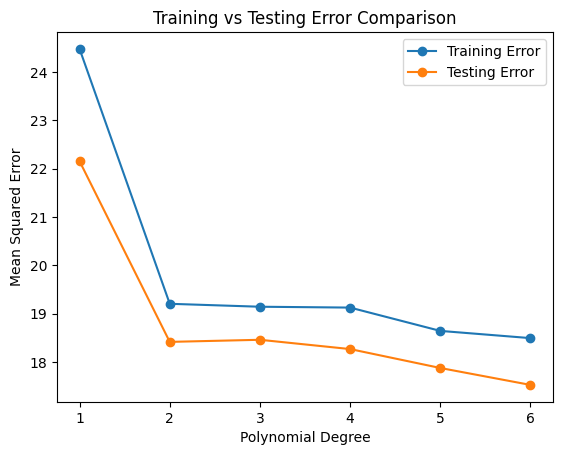

In [17]:
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5, 6]

for d in degrees:

    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Scale features
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Training prediction
    y_train_pred = model.predict(X_train_poly)

    # Testing prediction
    y_test_pred = model.predict(X_test_poly)

    # Calculate errors
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))


# Plot comparison
plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, test_errors, marker='o', label="Testing Error")

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Testing Error Comparison")
plt.legend()
plt.show()


Plot Polynomial Curve

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


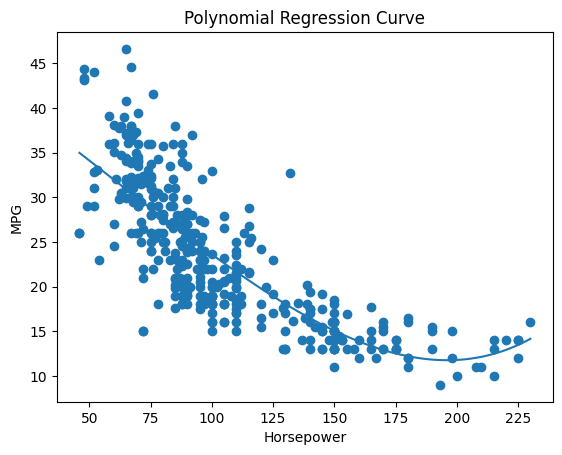

In [16]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

X_range_poly = poly.transform(X_range)
X_range_poly = scaler.transform(X_range_poly)

plt.scatter(X, y)
plt.plot(X_range, ridge.predict(X_range_poly))
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve")
plt.show()